In [116]:
library(dplyr)
library(stringr)
library(KoNLP)
library(ggplot2)

# raw데이터 전처리

In [117]:
raw_txt <- readLines('2014-2017.txt', encoding='cp949')
head(raw_txt)

Warning message in readLines("2014-2017.txt", encoding = "cp949"):
"'2014-2017.txt'에서 불완전한 마지막 행이 발견되었습니다"

[1] "trip_num:4"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
[2] "title: 4인 가족여행 후기 올려요"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

텍스트에서 변수별로 분리

In [118]:
trip_num <- str_subset(raw_txt,'trip_num:')
content <- str_subset(raw_txt, 'content:')

head(trip_num, 3)
head(content,3)

[1] "trip_num:4" "trip_num:4" "trip_num:3"

[1] "content: 이번 제주여행은 별 기대없이 갔는데집으로 가려니 왜 이리 아쉬운지 다음을 또 기약하며 제가 다녀온 후기남겨요 1일차  공항 아주렌트카 태백산 동복해녀직판장 루나마르펜션 월정리바닷가 태백산   고깃집   노형동원래는 함덕바다갔다가 근처에서 밥먹으려했는데 아들이 돼지갈비먹고싶데서 고기먹으러갔어요 여기 정식도 진짜맛있는데갈비도 짱맛나요  가성비대비해서도 좋아요 동복해녀 직판장 별루에요이만원에 해산물  진짜 조금줘요 마트에서 사는게 나을듯요  숙소 루나마르펜션  월정리예전부터 가고싶었는데괜찮았어요 깔끔해요 늦게도착해 큰애만 살짝수영하고 들어왔어요추가비용받았어요 취사는안되구요 2일차 명진전복 아쿠아플라넷 교래휴양림 아침 명진전복  갈때마다 가는편인데 이번엔 그냥그랬어요 9시반에가서 열시쯤 먹었어요 아쿠아플라넷 가실꺼면 아레나공연은무조건보세요 안보심 후회합니다 다음날 한라산등반예정이라 교래휴양림 예약했어요 완전깨끗하고 좋았어요휴양림 한시간정도 산책했어요사람들 거의없고 조용해요 3일차  노루생태관찰원 절물휴양림 사려니숲피자 마방목지 산방산초가집 빌라노이펜션 남편  아들은 성판악 관음사 코스로 등반8시에 출발하여 세시반안되서 내려왔어요 대단한듯싶었네요 저랑  작은애는 노루생태관찰원가서 노루먹이주고  절물휴양림가서 만들기하고  점심은 사려니숲길피자 집갔는데 맛있어요 반반피자도됩니다 마방목지 잠깐들렀다 사진만찍고 관음사주차장으로 데리러갔네요어린이있음 제가 간 곳 모두 추천합니다 숙소 빌라노이 제주  안덕 여기정말강추합니다저흰 302호갔는데 여기뷰가 젤좋은듯해요산방산 뷰인데 펜션이 너무좋아요아래사진에서 폴딩도어 다 열어 젖히면 산방산이 뙇  거짓말좀보태서 화장실도 호텔보다 더좋은듯요  추가요금 받아요 인당15천원아침에 파니니 샐러드 주는데 맛있어요 저녁 산방산 초가집 안덕 전복 해물전골집인데 무난했어요전복은 살살녹아요 4일차  외돌개 올레시장 쌍둥이횟집 바당뜰펜션 외돌개 중국인없어 좋았어요 근처 황우지해안 선녀탕 에서 수영 스노쿨링하는사람들있었어요 올레시장  열한시쯤가니별로 살거도먹거리도 없어 그냥왔네요 점심 쌍둥이횟집    2인상 먹었는데 회가 넘적어요다음에는안갈듯요 스끼다시는 다양해요 숙소 바당뜰펜션 안덕예전에 문어잡은후로 매번가는곳 바닷물이 별로변함없는시기라 문어는 못잡고남편이 낚시해서 쥐치랑 다금바리같은거잡아서 매운탕해먹었네요 5일차  도두해녀의집 느영나영매장 아침 도두해녀의집 전복죽은맛있었고 남편은 특물회먹었는데 우와할정도는 아니라하네요 느영나영매장  언제나친절하시고애플망고  초콜렛등사고 비행기타러 왔네요"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

데이터 이상여부 체크

In [119]:
table(is.na(trip_num))
table(is.na(content))
message( 'trip_num_len:', length(trip_num))
message( 'content_len:', length(content))


FALSE 
  871 


FALSE 
  871 

trip_num_len:871
content_len:871


label 제거 후 데이터프레임 생성

In [120]:
trip_num <- str_replace(trip_num, 'trip_num:','')
# trip_num은 numeric으로 변환
trip_num <- as.numeric(trip_num)

content <- str_replace(content, 'content:','')

df_txt <- tibble('trip_num' = trip_num, 'content' = content)
head(df_txt)

trip_num,content


관광지명을 정확히 추출하기 위해 띄어쓰기를 제거하는 작업이 필요 
( 하나의 noun으로 인식시키기 위함 )

In [121]:
# named vector 생성
spots_spaced  <- readLines('spots_spaced.txt', encoding='cp949')
spots_attached  <-  str_replace(spots_spaced, '\\s','')
names(spots_attached) <- spots_spaced

head(spots_attached)

유리의 성      선녀와 나무꾼      생각하는 정원        동굴의 다원 
        "유리의성"     "선녀와나무꾼"     "생각하는정원"       "동굴의다원" 
       사려니 숲길  박물관은 살아있다 
      "사려니숲길" "박물관은살아있다"

In [122]:
df_txt$content  <- df_txt$content %>% str_replace_all(spots_attached)

## KoNLP 텍스트마이닝

관광지 리스트 dictionray 생성

In [123]:
dictList  <- readLines('add_dic.txt', encoding='cp949')

head(dictList)

Warning message in readLines("add_dic.txt", encoding = "cp949"):
"'add_dic.txt'에서 불완전한 마지막 행이 발견되었습니다"

[1] "성산일출봉"     "월정리해변"     "협재해변"       "산굼부리"      
[5] "한담공원"       "함덕서우봉해변"

In [124]:
# 최소한의 작업을 위해 dictionary 최소화
buildDictionary(ext_dic='', user_dic=data.frame(dictList,'ncn'),replace_usr_dic = T)

284902 words dictionary was built.


2박3일 간의 데이터만 추출

In [125]:
df_txt_1  <- df_txt  %>% filter(trip_num==2)  %>% select(content)

In [126]:
words <- extractNoun(df_txt_1$content)

In [127]:
words[1]

[[1]]
  [1] "제주"           "여행"           "지"             "2"             
  [5] "주"             "후"             "작성"           "세"            
  [9] "명"             "가족"           "여행"           "5월20일"       
 [13] "22"             "2"              "박"             "3"             
 [17] "패키지여행"     "홈소핑을"       "처음"           "것"            
 [21] "저희"           "가족"           "만족"           "여행"          
 [25] "여행"           "제주"           "이곳"           "혼자"          
 [29] "여행"           "가을"           "생각"           "중이"          
 [33] "5월20일첫째날"  "오후"           "4"              "시"            
 [37] "비행기"         "대구"           "출발"           "팀"            
 [41] "저희"           "도착"           "시간"           "첫날"          
 [45] "가이드"         "분"             "저희"           "가족"          
 [49] "군데"           "관광"           "숙소"           "수목원테마파크"
 [53] "관람"           "1"              "층"             "얼음"          
 [57] "공간"           "2"              "층"             "5"             
 [61] "상영관"         "호러라"         "3"              "층"            
 [65] "착시아트인데"   "여기"           "것"             "여기"          
 [69] "사진"           "수"             "1"              "시간"          
 [73] "관람"           "후"             "메종글래드"     "호텔"          
 [77] "이"             "동"             "친절"           "깔끔"          
 [81] "이틀"           "지내는동안"     "만족"           "조식"          
 [85] "소문"           "들었구요"       "체크인"         "후"            
 [89] "동문시장"       "올레수산을"     "대"             "옆"            
 [93] "월척"           "수산"           "고등어"         "회"            
 [97] "돔"             "세트"           "상차림"         "해서"          
[101] "전"             "고등어"         "회"             "고소"          
[105] "매운탕"         "진짜"           "자유"           "식"            
[109] "5월21일"        "둘째"           "날"             "패키지"        
[113] "관광"           "하루"           "일정"           "5시반에"       
[117] "6시30분"        "호텔"           "조식"           "카멜리아힐"    
[121] "산책"           "이른아침이고"   "날씨"           "상쾌"          
[125] "풍경"           "곳곳"           "포인트"         "산책"          
[129] "하기"           "외돌개"         "외돌개"         "배경"          
[133] "사진촬용을"     "바다"           "구경"           "퍼시픽랜드"    
[137] "원숭이"         "물개"           "돌고래"         "공연"          
[141] "관람"           "아이"           "들이"           "만"            
[145] "한"             "곳"             "저희"           "동물"          
[149] "들"             "재롱"           "잠수함"         "때"            
[153] "가팔라"         "곳"             "바다"           "속"            
[157] "물고기"         "순간"           "신비"           "여기"          
[161] "입구"           "잠수함"         "내"             "사진"          
[165] "한"             "장"             "무료"           "추가"          
[169] "사진"           "5"              "천"             "원"            
[173] "가족"           "사진"           "한"             "장"            
[177] "송악산"         "둘레"           "길"             "해안가"        
[181] "수"             "올레길"         "바다"           "가슴"          
[185] "확"             "기분"           "더마"           "파크"          
[189] "공연"           "몽골젊은"       "남녀"           "들이"          
[193] "말"             "주몽이야기를"   "공연"           "말"            
[197] "능숙"           "묘기"           "박수"           "환호성"        
[201] "코믹"           "부분"           "공연"           "진짜"          
[205] "추천"           "부모님"         "점심"           "고등"          
[209] "어조"           "림"             "고등어"         "육지"          
[213] "거랑"           "고등어"         "자체"           "신선"          
[217] "중간"           "관광농원"       "상황버석"       "설명"          
[221] "엄마"           "싶대서"         "구입"           "일정"          
[225] "저녁"           "늘봄흑돼지"     "자유"           "식"            
[229] "친구"           "가이드"         "분"             "추천"          
[233] "곳"             "사람들"         "대"             "수"            
[237] "기본"           "찬"             "5월22일"        "셋째"          
[241] "날"             "호텔"           "조식"    

하나의 게시글당 중복 단어를 제거

In [128]:
words  <- lapply(words,unique)

words[[1]]

[1] "제주"           "여행"           "지"             "2"             
  [5] "주"             "후"             "작성"           "세"            
  [9] "명"             "가족"           "5월20일"        "22"            
 [13] "박"             "3"              "패키지여행"     "홈소핑을"      
 [17] "처음"           "것"             "저희"           "만족"          
 [21] "이곳"           "혼자"           "가을"           "생각"          
 [25] "중이"           "5월20일첫째날"  "오후"           "4"             
 [29] "시"             "비행기"         "대구"           "출발"          
 [33] "팀"             "도착"           "시간"           "첫날"          
 [37] "가이드"         "분"             "군데"           "관광"          
 [41] "숙소"           "수목원테마파크" "관람"           "1"             
 [45] "층"             "얼음"           "공간"           "5"             
 [49] "상영관"         "호러라"         "착시아트인데"   "여기"          
 [53] "사진"           "수"             "메종글래드"     "호텔"          
 [57] "이"             "동"             "친절"           "깔끔"          
 [61] "이틀"           "지내는동안"     "조식"           "소문"          
 [65] "들었구요"       "체크인"         "동문시장"       "올레수산을"    
 [69] "대"             "옆"             "월척"           "수산"          
 [73] "고등어"         "회"             "돔"             "세트"          
 [77] "상차림"         "해서"           "전"             "고소"          
 [81] "매운탕"         "진짜"           "자유"           "식"            
 [85] "5월21일"        "둘째"           "날"             "패키지"        
 [89] "하루"           "일정"           "5시반에"        "6시30분"       
 [93] "카멜리아힐"     "산책"           "이른아침이고"   "날씨"          
 [97] "상쾌"           "풍경"           "곳곳"           "포인트"        
[101] "하기"           "외돌개"         "배경"           "사진촬용을"    
[105] "바다"           "구경"           "퍼시픽랜드"     "원숭이"        
[109] "물개"           "돌고래"         "공연"           "아이"          
[113] "들이"           "만"             "한"             "곳"            
[117] "동물"           "들"             "재롱"           "잠수함"        
[121] "때"             "가팔라"         "속"             "물고기"        
[125] "순간"           "신비"           "입구"           "내"            
[129] "장"             "무료"           "추가"           "천"            
[133] "원"             "송악산"         "둘레"           "길"            
[137] "해안가"         "올레길"         "가슴"           "확"            
[141] "기분"           "더마"           "파크"           "몽골젊은"      
[145] "남녀"           "말"             "주몽이야기를"   "능숙"          
[149] "묘기"           "박수"           "환호성"         "코믹"          
[153] "부분"           "추천"           "부모님"         "점심"          
[157] "고등"           "어조"           "림"             "육지"          
[161] "거랑"           "자체"           "신선"           "중간"          
[165] "관광농원"       "상황버석"       "설명"           "엄마"          
[169] "싶대서"         "구입"           "저녁"           "늘봄흑돼지"    
[173] "친구"           "사람들"         "기본"           "찬"            
[177] "5월22일"        "셋째"           "에코랜드"       "역"            
[181] "개"             "한코스"         "다음"           "겸"            
[185] "이동"           "기차"           "동안"           "숲"            
[189] "여유"           "데"             "점"             "적"            
[193] "워터"           "서커스"         "중국"           "우크라이나"    
[197] "러시아인"       "공중"           "쇼"             "다이빙"        
[201] "등"             "재밌기도"       "중국아이들은"   "안쓰럽기도"    
[205] "조랑말"         "승마"           "체험"           "조끼"          
[209] "빨깐조끼를"     "한바퀴"         "코스"           "말타는"        
[213] "마음"           "불편"           "번"             "려구요"        
[217] "나오긴"         "액자"           "돼지불고기"     "쑥"            
[221] "좀쌀"           "막걸리"         "고사리"         "무생"          
[225] "채"             "성읍민속마을"   "전통"           "초가집"        
[229] "이야기"         "상품"           "홍보"           "오미자"        
[233] "구입했구요"     "우도"           "유람선"         "성산일출봉"    
[237] "선장"           "님"             "해설"           "재미"          
[241] "나름"           "너울"           "성"             "파도"          
[245] "시원"           "용두암"         "해녀" 

글자수 2개 이상으로 필터링

In [129]:
words <- lapply(words, function(x) x[nchar(x)>= 2])

words[[1]]

[1] "제주"           "여행"           "작성"           "가족"          
  [5] "5월20일"        "22"             "패키지여행"     "홈소핑을"      
  [9] "처음"           "저희"           "만족"           "이곳"          
 [13] "혼자"           "가을"           "생각"           "중이"          
 [17] "5월20일첫째날"  "오후"           "비행기"         "대구"          
 [21] "출발"           "도착"           "시간"           "첫날"          
 [25] "가이드"         "군데"           "관광"           "숙소"          
 [29] "수목원테마파크" "관람"           "얼음"           "공간"          
 [33] "상영관"         "호러라"         "착시아트인데"   "여기"          
 [37] "사진"           "메종글래드"     "호텔"           "친절"          
 [41] "깔끔"           "이틀"           "지내는동안"     "조식"          
 [45] "소문"           "들었구요"       "체크인"         "동문시장"      
 [49] "올레수산을"     "월척"           "수산"           "고등어"        
 [53] "세트"           "상차림"         "해서"           "고소"          
 [57] "매운탕"         "진짜"           "자유"           "5월21일"       
 [61] "둘째"           "패키지"         "하루"           "일정"          
 [65] "5시반에"        "6시30분"        "카멜리아힐"     "산책"          
 [69] "이른아침이고"   "날씨"           "상쾌"           "풍경"          
 [73] "곳곳"           "포인트"         "하기"           "외돌개"        
 [77] "배경"           "사진촬용을"     "바다"           "구경"          
 [81] "퍼시픽랜드"     "원숭이"         "물개"           "돌고래"        
 [85] "공연"           "아이"           "들이"           "동물"          
 [89] "재롱"           "잠수함"         "가팔라"         "물고기"        
 [93] "순간"           "신비"           "입구"           "무료"          
 [97] "추가"           "송악산"         "둘레"           "해안가"        
[101] "올레길"         "가슴"           "기분"           "더마"          
[105] "파크"           "몽골젊은"       "남녀"           "주몽이야기를"  
[109] "능숙"           "묘기"           "박수"           "환호성"        
[113] "코믹"           "부분"           "추천"           "부모님"        
[117] "점심"           "고등"           "어조"           "육지"          
[121] "거랑"           "자체"           "신선"           "중간"          
[125] "관광농원"       "상황버석"       "설명"           "엄마"          
[129] "싶대서"         "구입"           "저녁"           "늘봄흑돼지"    
[133] "친구"           "사람들"         "기본"           "5월22일"       
[137] "셋째"           "에코랜드"       "한코스"         "다음"          
[141] "이동"           "기차"           "동안"           "여유"          
[145] "워터"           "서커스"         "중국"           "우크라이나"    
[149] "러시아인"       "공중"           "다이빙"         "재밌기도"      
[153] "중국아이들은"   "안쓰럽기도"     "조랑말"         "승마"          
[157] "체험"           "조끼"           "빨깐조끼를"     "한바퀴"        
[161] "코스"           "말타는"         "마음"           "불편"          
[165] "려구요"         "나오긴"         "액자"           "돼지불고기"    
[169] "좀쌀"           "막걸리"         "고사리"         "무생"          
[173] "성읍민속마을"   "전통"           "초가집"         "이야기"        
[177] "상품"           "홍보"           "오미자"         "구입했구요"    
[181] "우도"           "유람선"         "성산일출봉"     "선장"          
[185] "해설"           "재미"           "나름"           "너울"          
[189] "파도"           "시원"           "용두암"         "해녀"          
[193] "바닷가"         "계시"           "잠수"           "가게"          
[197] "해산물"         "한접시랑"       "전복"           "성게"          
[201] "국수"           "공항"           "저녁7시35분"    "에어"          
[205] "부산"           "홈쇼핑"         "예약"           "선물"          
[209] "오메기떡"       "30"             "상자"           "사람"          
[213] "2박3일동안"     "다양"           "아이둘"         "경우"          
[217] "4군데정도"      "구매"           "거기"           "필요"          
[221] "부담"           "듣다보면"       "유혹"           "3일내내"       
[225] "순조"           "기사"           "하시"           "까페"          
[229] "공부"           "틈틈히"         "하려구"

동의어 synonym 처리

In [130]:
synonym_df <- read.csv('synonym.csv',header=F,stringsAsFactors=F)
synonym_df

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
1100고지,,,,,,,,,,,,,,,
비자림로,1112도로,,,,,,,,,,,,,,
43평화공원,평화공원,,,,,,,,,,,,,,
516도로숲터널,516도로숲터널,,,,,,,,,,,,,,
SOS박물관,SOS,,,,,,,,,,,,,,
가마오름,가마오름진지동굴,,,,,,,,,,,,,,
가메오름,,,,,,,,,,,,,,,
가문이오름,감은이오름,,,,,,,,,,,,,,
가새기오름,,,,,,,,,,,,,,,
가세오름,,,,,,,,,,,,,,,


관광지 하나당 동의어가 이어지도록 리스트로 생성 ( 빈 값들은 지운다. )

In [131]:
# 관광지 개수 길이의 빈 list 생성
synonym_list <- vector('list', length=nrow(synonym_df))

for(i in 1:length(synonym_list)){
    spot <- unlist(synonym_df[i,], use.names = F)
# 공백은 제거
    synonym_list[[i]] <- spot[spot!=''] }
rm(spot)

head(synonym_list,5)

[[1]]
[1] "1100고지"

[[2]]
[1] "비자림로" "1112도로"

[[3]]
[1] "43평화공원" "평화공원"  

[[4]]
[1] "516도로숲터널" "516도로숲터널"

[[5]]
[1] "SOS박물관" "SOS"

여행코스 생성
( 동의어 중에 하나라도 존재하면 관광지가 추가되는 알고리즘 )

In [132]:
# course를 입력할 list 생성
courses <- vector('list', length=length(words))

num <- 1

for( word in words){
    for(synonym in synonym_list){
        if( sum( word %in% synonym )!= 0)
            courses[[num]] <- courses[[num]] %>% append(synonym[1])}
        if(!is.null(courses[[num]]))
            num <- num+1}

In [134]:
length(courses)
# null값이 존재하는 지 여부 확인
sum(unlist(lapply(courses, function(x) sum(is.null(x)))))

[1] 305

[1] 6

In [136]:
# NULL 값 6개 리스트 제거 ( 305-6 )
courses = courses[1:299]

In [137]:
courses

[[1]]
 [1] "동문시장"       "성산일출봉"     "성읍민속마을"   "송악산"        
 [5] "수목원테마파크" "에코랜드"       "올레길"         "외돌개"        
 [9] "용두암"         "우도"           "카멜리아힐"     "퍼시픽랜드"    

[[2]]
[1] "에코랜드"           "협재해변"           "휴애리자연생활공원"

[[3]]
 [1] "1100고지"         "곶자왈"           "군산오름"         "만장굴"          
 [5] "방주교회"         "산굼부리"         "섭지코지"         "성산일출봉"      
 [9] "에코랜드"         "용두암"           "우도"             "청수곶자왈"      
[13] "함덕서우봉해변"   "환상숲곶자왈공원"

[[4]]
[1] "곽지과물해변"         "산방산"               "송악산"              
[4] "오설록티뮤지엄"       "이니스프리제주하우스" "퍼시픽랜드"          

[[5]]
 [1] "동문시장"       "산방산"         "섭지코지"       "성산일출봉"    
 [5] "송악산"         "수월봉"         "용눈이오름"     "용머리해안"    
 [9] "월정리해변"     "카멜리아힐"     "표선해비치해변"

[[6]]
[1] "용머리해안"   "월정리해변"   "중문색달해변"

[[7]]
 [1] "김녕성세기해변"   "넥슨컴퓨터박물관" "대포주상절리"     "매일올레시장"    
 [5] "산방산"           "성산일출봉"       "아쿠아플라넷"     "에코랜드"        
 [9] "우도"             "천지연폭포"      

[[8]]
[1] "메이즈랜드"         "에코랜드"           "자동차제주박물관"  
[4] "카멜리아힐"         "한담해변"           "협재해변"          
[7] "휴애리자연생활공원"

[[9]]
 [1] "김녕미로공원"     "두산봉"           "삼양검은모래해변" "섭지코지"        
 [5] "성산일출봉"       "세화해변"         "아쿠아플라넷"     "우도"            
 [9] "월정리해변"       "종달리"           "지미봉"          

[[10]]
 [1] "곽지과물해변"   "드라마월드"     "제주러브랜드"   "마라도"        
 [5] "메이즈랜드"     "선녀와나무꾼"   "오설록티뮤지엄" "용머리해안"    
 [9] "우도"           "유리박물관"     "점보빌리지"     "천지연폭포"    
[13] "허브동산"       "협재해변"      

[[11]]
[1] "광치기해변"         "대포주상절리"       "섭지코지"          
[4] "쇠소깍"             "에코랜드"           "함덕서우봉해변"    
[7] "휴애리자연생활공원" "비자림"            

[[12]]
 [1] "더마파크"       "동문시장"       "매일올레시장"   "번개과학체험관"
 [5] "소천지"         "올레길"         "짚라인"         "천지연폭포"    
 [9] "표선해비치해변" "협재해변"      

[[13]]
 [1] "공룡랜드"       "광치기해변"     "김녕성세기해변" "바다체험장"    
 [5] "월정리해변"     "이호테우해변"   "중문관광단지"   "파파월드"      
 [9] "퍼시픽랜드"     "하도해변"       "함덕서우봉해변"

[[14]]
 [1] "광치기해변"     "대포주상절리"   "돌문화공원"     "매일올레시장"  
 [5] "새연교"         "섭지코지"       "여미지식물원"   "정방폭포"      
 [9] "천제연폭포"     "천지연폭포"     "제주해녀박물관"

[[15]]
[1] "광치기해변"       "성산일출봉"       "세화해변"         "오설록티뮤지엄"  
[5] "월정리해변"       "자동차제주박물관" "항공우주박물관"   "협재해변"        

[[16]]
[1] "가파도"         "모슬포항"       "산방산"         "한라산국립공원"

[[17]]
[1] "김녕미로공원"   "김녕성세기해변" "논짓물"         "세화해변"      
[5] "쇠소깍"         "함덕서우봉해변"

[[18]]
[1] "곶자왈"         "붉은오름"       "월정리해변"     "제주해녀박물관"
[5] "비자림"        

[[19]]
 [1] "곽지과물해변"       "대포주상절리"       "더마파크"          
 [4] "방주교회"           "삼양검은모래해변"   "섭지코지"          
 [7] "성산일출봉"         "에코랜드"           "점보빌리지"        
[10] "정방폭포"           "제주절물자연휴양림" "협재해변"          

[[20]]
[1] "1100고지"           "광치기해변"         "노리매공원"        
[4] "산방산"             "성산일출봉"         "위미리동백나무군락"

[[21]]
 [1] "대포주상절리"       "만장굴"             "매일올레시장"      
 [4] "믿거나말거나박물관" "새별오름"           "새연교"            
 [7] "약천사"             "월정리해변"         "중문승마공원"      
[10] "표선해비치해변"     "플레이케이팝"      

[[22]]
[1] "동문시장"       "선녀와나무꾼"   "섭지코지"       "우도"          
[5] "표선해비치해변"

[[23]]
 [1] "대포주상절리"       "동문시장"           "매일올레시장"      
 [4] "산방산"             "송악산"             "쇠소깍"            
 [7] "오설록티뮤지엄"     "용머리해안"         "이중섭거리"        
[10] "정방폭포"           "제주절물자연휴양림" "카멜리아힐"        

[[24]]
 [1] "김녕성세기해변" "동문시장"       "매일올레시장"   "섭지코지"      
 [5] "성산일출봉"     "세화해변"       "우도"           "월정리해변"    
 [9] "카멜리아힐"     "협재해변"      

[[25]]
[1] "오설록티뮤지엄"       "이니스프리제주하우스" "표선해비치해변"      
[4] "헬로키티아일랜드"    

[[26]]
[1] "대포주상절리" "우도"         "월정리해변"  

[[27]]
[1] "동문시장"         "송악산"           "함덕서우봉해변"   "환상숲곶자왈공원"
[5] "비자림"          

[[28]]
[1] "1100고지"           "광치기해변"         "동문시장"          
[4] "산굼부리"           "성산일출봉"         "용두암"            
[7] "제주절물자연휴양림" "커피박물관"        

[[29]]
[1] "다이나믹메이즈"     "메이즈랜드"         "선운정사"          
[4] "에코랜드"           "위미리동백나무군락" "카멜리아힐"        
[7] "한라산국립공원"     "협재해변"          

[[30]]
[1] "1100고지"           "군산오름"           "매일올레시장"      
[4] "산방산"             "송악산"             "위미리동백나무군락"
[7]

## 여행코스 분석

관광지 wordcloud

In [139]:
library(wordcloud)

Loading required package: RColorBrewer


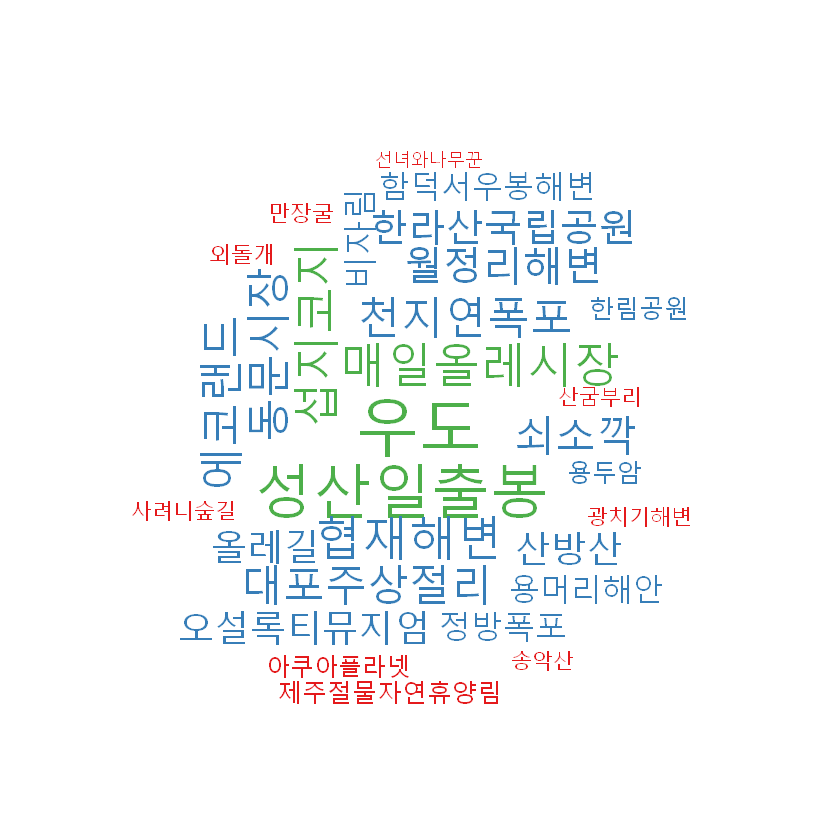

In [140]:
top30 <- as.data.frame(table(unlist(course)))  %>% arrange(desc(Freq)) %>% head(30)
palete<-brewer.pal(3,"Set1") # color 3가지
wordcloud(top30$Var1, top30$Freq, color = palete, random.color=F, random.order = F, max.words = 30)

관광지 Top 10

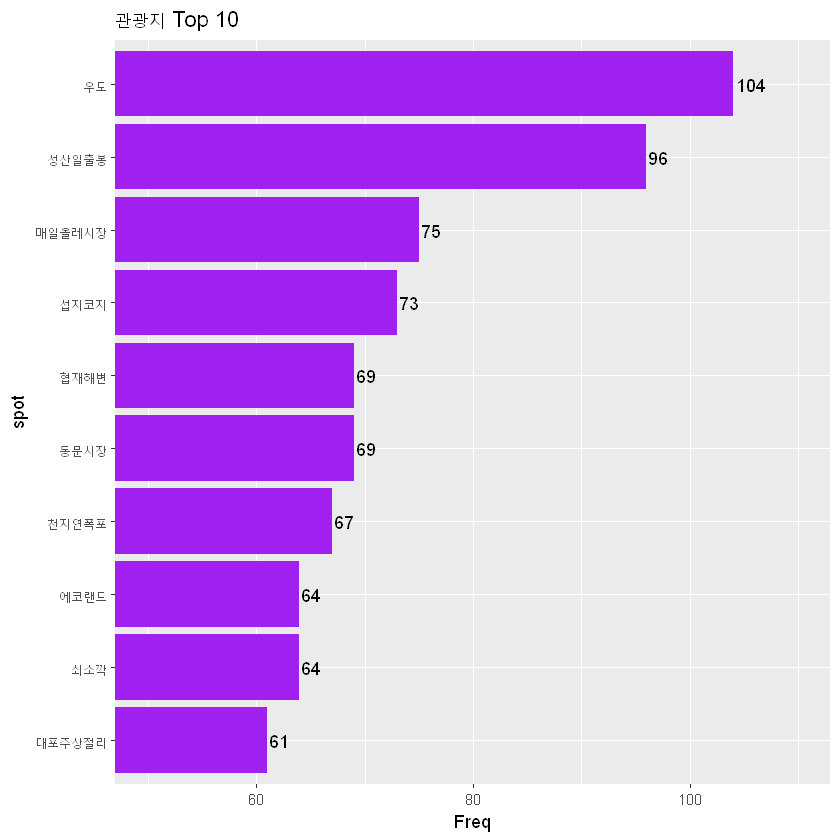

In [141]:
spot_top10 <- as.data.frame(table(unlist(course)))  %>% arrange(desc(Freq)) %>% head(10)  %>% rename(spot=Var1)

ggplot(spot_top10,aes(x=reorder(spot, Freq),y=Freq)) + geom_col(fill='purple') + labs(x='spot', title='관광지 Top 10') + coord_flip(ylim=c(50,110)) + geom_text(aes(label=Freq, hjust= -0.1))

### 장바구니 분석

In [144]:
library(arules)

Loading required package: Matrix

Attaching package: 'arules'

The following object is masked from 'package:dplyr':

    recode

The following objects are masked from 'package:base':

    abbreviate, write



In [146]:
# transaction용 프레임으로 변환
course.trans <- as(courses, 'transactions')

In [147]:
# support confidence 최소 기준을 설정
rules <- apriori(course.trans, parameter= list(support=0.1,confidence=0.3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 29 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[217 item(s), 299 transaction(s)] done [0.00s].
sorting and recoding items ... [23 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [18 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [148]:
inspect(rules)

     lhs               rhs            support   confidence lift     count
[1]  {}             => {성산일출봉}   0.3210702 0.3210702  1.000000  96  
[2]  {}             => {우도}         0.3478261 0.3478261  1.000000 104  
[3]  {쇠소깍}       => {우도}         0.1103679 0.5156250  1.482422  33  
[4]  {우도}         => {쇠소깍}       0.1103679 0.3173077  1.482422  33  
[5]  {동문시장}     => {성산일출봉}   0.1070234 0.4637681  1.444444  32  
[6]  {성산일출봉}   => {동문시장}     0.1070234 0.3333333  1.444444  32  
[7]  {대포주상절리} => {매일올레시장} 0.1036789 0.5081967  2.026011  31  
[8]  {매일올레시장} => {대포주상절리} 0.1036789 0.4133333  2.026011  31  
[9]  {매일올레시장} => {천지연폭포}   0.1003344 0.4000000  1.785075  30  
[10] {천지연폭포}   => {매일올레시장} 0.1003344 0.4477612  1.785075  30  
[11] {천지연폭포}   => {우도}         0.1103679 0.4925373  1.416045  33  
[12] {우도}         => {천지연폭포}   0.1103679 0.3173077  1.416045  33  
[13] {섭지코지}     => {성산일출봉}   0.1204013 0.4931507  1.535959  36  
[14] {성산일출봉}   => {섭지코지}     0.1204013 0.3750000  1.535959  36  
[15